### Load Data

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [316]:
folder = "../../output/"
time = "2025-09-17_15-25"
df_summery = pd.read_csv(folder + f"summary_{time}.csv")
df_summery = df_summery[~df_summery['llm'].isin(exclude_llms)]
df_summery

,dataset,action,llm,?A1=A2,?A1=A3+A4,?A1>A3,?A1>A4,?A3∅A4,?A4=A1|3,?A1=A1*,...,?A1=A3+A4(+),?A1=A3+A4(-),J(1-34)+,J(1-34)-,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3)
0,qawiki,classification,deepseek-chat,0.9800,0.8467,0.9000,0.9333,0.5600,0.4533,0.5133,...,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.8313,0.0000
1,qawiki,classification,deepseek-reasoner,0.7267,0.8533,0.9133,0.8933,0.4533,0.3733,0.3867,...,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,qawiki,classification,gemini-2.0-flash,0.8667,0.8867,1.0000,0.9533,0.3533,0.2933,0.4667,...,0.885135,1.000000,0.949498,1.000000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,qawiki,classification,gemini-2.5-flash,0.8933,0.9467,1.0000,0.9800,0.8267,0.7733,0.2600,...,0.965278,0.500000,0.981066,0.922233,0.0000,0.0000,0.0000,0.0000,0.7388,0.0000
4,qawiki,classification,gemini-2.5-pro,0.9000,0.7200,1.0000,0.8467,0.8800,0.6200,0.3000,...,0.757143,0.200000,0.862464,0.486910,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,overall,zero-shot,gpt-oss:20b,0.2400,0.1667,0.4244,0.3511,0.8267,0.1111,NaN,...,0.172170,0.076923,0.428284,0.299196,0.5220,0.5251,0.5183,0.5194,0.5255,0.5304
262,overall,zero-shot,grok-3-mini,0.3667,0.2867,0.5533,0.4733,0.8867,0.2556,NaN,...,0.291572,0.090909,0.614228,0.376955,0.5195,0.5211,0.5191,0.5191,0.5304,0.5215
263,overall,zero-shot,llama3.1:70b,0.2356,0.0756,0.3044,0.2600,0.7111,0.0400,NaN,...,0.074492,0.142857,0.370641,0.466443,0.5227,0.5363,0.5205,0.5210,0.5205,0.5469
264,overall,zero-shot,llama3.1:8b,0.0200,0.0022,0.0622,0.0444,0.8267,0.0000,NaN,...,NaN,NaN,NaN,NaN,0.5660,0.6875,0.5390,0.5456,0.5238,1.0000


In [317]:
df_relation = pd.read_csv(folder + f"relation_summary_{time}.csv")
df_relation = df_relation[~df_relation['llm'].isin(exclude_llms)]
df_relation

,llm,dataset,relation,True,Accuracy,Size,Equivalence,Contains,ContainedBy,Overlap,Disjoint,Unknown,Else
0,deepseek-chat,qawiki,R(1-2),Equivalence,0.9800(147),150,0.9800(147),0.0000(0),0.0000(0),0.0200(3),0.0000(0),0.0000(0),0.0000(0)
1,deepseek-chat,qawiki,R(1-3),Contains,0.2333(35),150,0.0067(1),0.2333(35),0.7400(111),0.0200(3),0.0000(0),0.0000(0),0.0000(0)
2,deepseek-chat,qawiki,R(1-4),Contains,0.2000(30),150,0.0000(0),0.2000(30),0.0333(5),0.5933(89),0.1733(26),0.0000(0),0.0000(0)
3,deepseek-chat,qawiki,R(3-4),Disjoint,1.0000(150),150,0.0000(0),0.0000(0),0.0000(0),0.0000(0),1.0000(150),0.0000(0),0.0000(0)
4,deepseek-chat,qawiki,R(1-34),Equivalence,0.9267(139),150,0.9267(139),0.0133(2),0.0000(0),0.0133(2),0.0467(7),0.0000(0),0.0000(0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,o3,overall,R(1-2),Equivalence,0.9133(411),450,0.9133(411),0.0356(16),0.0378(17),0.0000(0),0.0022(1),0.0111(5),0.0000(0)
316,o3,overall,R(1-3),Contains,0.9733(438),450,0.0111(5),0.9733(438),0.0022(1),0.0022(1),0.0022(1),0.0089(4),0.0000(0)
317,o3,overall,R(1-4),Contains,0.9733(438),450,0.0111(5),0.9733(438),0.0000(0),0.0044(2),0.0089(4),0.0022(1),0.0000(0)
318,o3,overall,R(3-4),Disjoint,0.9467(426),450,0.0044(2),0.0067(3),0.0044(2),0.0200(9),0.9467(426),0.0178(8),0.0000(0)


In [318]:
df_p_value = pd.read_csv(folder + f"p_value_matrices_{time}.csv")
df_p_value = df_p_value[~df_p_value['llm'].isin(exclude_llms)]
df_p_value

,action,dataset,predicate,llm,deepseek-chat,gemini-2.0-flash,gemini-2.5-flash,gemini-2.5-pro,gpt-4.1-2025-04-14,gpt-4.1-mini-2025-04-14,...,gpt-4o,gpt-5,gpt-5-mini,gpt-5-nano,gpt-oss:20b,grok-3-mini,llama3.1:70b,llama3.1:8b,o3,deepseek-reasoner
0,classification,overall,?A1=A2,deepseek-chat,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.6823,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,classification,overall,?A1=A2,deepseek-reasoner,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,0.9743,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000
2,classification,overall,?A1=A2,gemini-2.0-flash,1.0000,1.0000,0.9929,0.0013,1.0000,0.9995,...,1.0000,1.0000,0.8242,0.0000,0.0000,0.9925,0.0001,0.0000,0.0020,0.0000
3,classification,overall,?A1=A2,gemini-2.5-flash,1.0000,0.0099,1.0000,0.0000,0.9720,0.8074,...,1.0000,0.9542,0.0728,0.0000,0.0000,0.5266,0.0000,0.0000,0.0000,0.0000
4,classification,overall,?A1=A2,gemini-2.5-pro,1.0000,0.9991,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,0.0006,0.0000,1.0000,0.1878,0.0000,0.5834,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,zero-shot,synthetic,?A4=A1|3,gpt-oss:20b,0.1148,0.0059,0.9999,0.9998,0.5000,0.0047,...,0.0036,1.0000,0.9242,0.9999,1.0000,0.9999,0.0001,0.0000,0.9853,0.6762
1592,zero-shot,synthetic,?A4=A1|3,grok-3-mini,0.0000,0.0000,0.6358,0.5643,0.0003,0.0000,...,0.0000,0.8761,0.0100,0.5700,0.0003,1.0000,0.0000,0.0000,0.0939,0.0009
1593,zero-shot,synthetic,?A4=A1|3,llama3.1:70b,0.9988,0.9807,1.0000,1.0000,1.0000,0.9270,...,0.9805,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0039,1.0000,1.0000
1594,zero-shot,synthetic,?A4=A1|3,llama3.1:8b,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# P-values

### pairwise

In [319]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # if you prefer pure Matplotlib, see the alt. plotter below

# ---------- 1) Load & prepare -------------------------------------------------

def load_pvalue_frame(csv_file: str) -> pd.DataFrame:
    """Read CSV and return a DataFrame."""
    return pd.read_csv(csv_file)

def get_llm_columns(df: pd.DataFrame, exclude_llms=None) -> list[str]:
    """
    Identify LLM columns (everything after 'llm') and optionally exclude some.
    Returns the list of column names used as heatmap columns.
    """
    cols = df.columns.tolist()
    start = cols.index("llm") + 1
    llm_cols = cols[start:]
    if exclude_llms:
        llm_cols = [c for c in llm_cols if c not in exclude_llms]
    return llm_cols

def filter_llms(df: pd.DataFrame, exclude_llms=None) -> pd.DataFrame:
    """Drop rows (LLMs) the user wants to exclude."""
    if exclude_llms:
        return df[~df["llm"].isin(exclude_llms)].copy()
    return df

# ---------- 2) Build matrix per group ----------------------------------------

def build_square_matrix(subset: pd.DataFrame, llm_cols: list[str]) -> pd.DataFrame:
    """
    Rows = 'llm', Cols = llm_cols. Coerce to numeric.
    """
    mat = subset.set_index("llm")[llm_cols].copy()
    mat = mat.apply(pd.to_numeric, errors="coerce")
    return mat


# ---------- 3) Plot a single heatmap (seaborn) -------------------------------

def plot_single_heatmap(
    mat: pd.DataFrame,
    mask: pd.DataFrame,
    annot: pd.DataFrame,
    title: str,
    cmap: str = "Reds_r",
    alpha: float = 0.05,
    figsize: tuple[float, float] | None = None,
):
    """
    Create one heatmap figure and return (fig, ax).
    Only p <= alpha are colored (vmax=alpha), with [0, alpha] mapped to colormap.
    """
    if figsize is None:
        figsize = (max(6, 0.8 * mat.shape[1]), max(6, 0.8 * mat.shape[0]))

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        mat,
        mask=mask,
        annot=annot,
        fmt="",
        cmap=cmap,
        vmin=0.0, vmax=alpha,
        cbar_kws={"label": f"p-value (only p ≤ {alpha:g} shown)"},
        linewidths=0.5, linecolor="lightgray",
        ax=ax,
    )
    ax.set_title(title, fontsize=10)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    fig.tight_layout()
    return fig, ax


# ---------- 4) Save helper ----------------------------------------------------

def save_figure(fig, out_dir: str, predicate: str, dataset: str, action: str) -> str:
    """Save figure under out_dir/predicate/dataset_action_pvalues.png and return path."""
    pred_dir = os.path.join(out_dir, predicate)
    os.makedirs(pred_dir, exist_ok=True)
    fname = f"{dataset}_{action}_pvalues.png".replace(" ", "_")
    fpath = os.path.join(pred_dir, fname)
    fig.savefig(fpath, dpi=300)
    plt.close(fig)
    return fpath

# ---------- 5) Orchestrator ---------------------------------------------------

def plot_square_heatmaps(
    csv_file: str,
    out_dir: str = "heatmaps",
    cmap: str = "Reds_r",
    exclude_llms: list[str] | None = None,
    alpha: float = 0.05,
    use_matplotlib_only: bool = False,
) -> list[str]:
    """
    High-level: reads CSV, groups by (predicate, dataset, action),
    builds each matrix, plots, and saves. Returns list of saved file paths.
    """
    df = load_pvalue_frame(csv_file)
    df = filter_llms(df, exclude_llms)
    llm_cols = get_llm_columns(df, exclude_llms)

    os.makedirs(out_dir, exist_ok=True)
    saved = []

    for (predicate, dataset, action), subset in df.groupby(["predicate", "dataset", "action"]):
        if subset.empty:
            continue

        mat = build_square_matrix(subset, llm_cols)
        mask, annot = make_mask_and_annotations(mat, alpha=alpha)

        # Skip if nothing significant
        if (~mask).to_numpy().sum() == 0:
            print(f"Skipping {predicate} | {dataset} | {action}: no significant values.")
            continue

        title = f"{predicate} | {dataset} | {action}"
        if use_matplotlib_only:
            fig, _ = plot_single_heatmap_matplotlib(
                mat, mask, annot, title=title, alpha=alpha
            )
        else:
            fig, _ = plot_single_heatmap(
                mat, mask, annot, title=title, cmap=cmap, alpha=alpha
            )

        fpath = save_figure(fig, out_dir, predicate, dataset, action)
        print(f"Saved: {fpath}")
        saved.append(fpath)

    return saved


In [ ]:
def make_mask_and_annotations(
    mat: pd.DataFrame,
    alpha: float = 0.05,
    tiny: float =1-alpha,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Mask: True where not significant or NaN.
    Annot: "" for masked; '≈0' for very small; else value with 3 decimals.
    """
    mask = (mat < alpha) | mat.isna()
    annot = mat.copy()

    for r in annot.index:
        for c in annot.columns:
            v = annot.loc[r, c]
            if pd.isna(v) or v > alpha:
                annot.loc[r, c] = ""
            elif v <= tiny:
                annot.loc[r, c] = ""
            else:
                annot.loc[r, c] = f"{v:.3f}"
    return mask, annot


def plot_single_heatmap_matplotlib(mat, mask, annot, title, alpha=0.05, figsize=None):
    import numpy as np
    import matplotlib.pyplot as plt

    data = mat.copy()
    data[mask] = np.nan

    if figsize is None:
        figsize = (max(6, 0.8 * data.shape[1]), max(6, 0.8 * data.shape[0]))

    fig, ax = plt.subplots(figsize=figsize)
    # make cells square
    n, m = data.shape
    try:
        ax.set_box_aspect(n / m)
    except Exception:
        ax.set_aspect("equal", adjustable="box")

    # single colorbar
    im = ax.imshow(data, vmin=0.0, vmax=1.0, cmap="Reds", interpolation="nearest")
    cbar = plt.colorbar(im, ax=ax, shrink=0.5)  # shrink to 70% of default height
    cbar.set_label("(1-p) value (0 → low, 1 → high)")

    # ticks & labels
    ax.set_xticks(range(m)); ax.set_yticks(range(n))
    ax.set_xticklabels(list(data.columns), rotation=90)
    ax.set_yticklabels(list(data.index))
    ax.set_title(title, fontsize=10)

    ax.grid(False)

    # (optional) draw a thin border exactly once per cell
    # comment these out if you want no borders at all
    for x in range(m + 1):
        ax.axvline(x - 0.5, color="lightgray", linewidth=0.5)
    for y in range(n + 1):
        ax.axhline(y - 0.5, color="lightgray", linewidth=0.5)

    # annotations
    for i in range(n):
        for j in range(m):
            txt = annot.iloc[i, j]
            if txt != "":
                ax.text(j, i, txt, ha="center", va="center", fontweight="bold")

    fig.tight_layout()
    return fig, ax


/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2kn0vbfmjhhcspmjlt40000gq/T/ipykernel_51808/3657761697.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot.loc[r, c] = ""
/var/folders/pp/f9hxx2

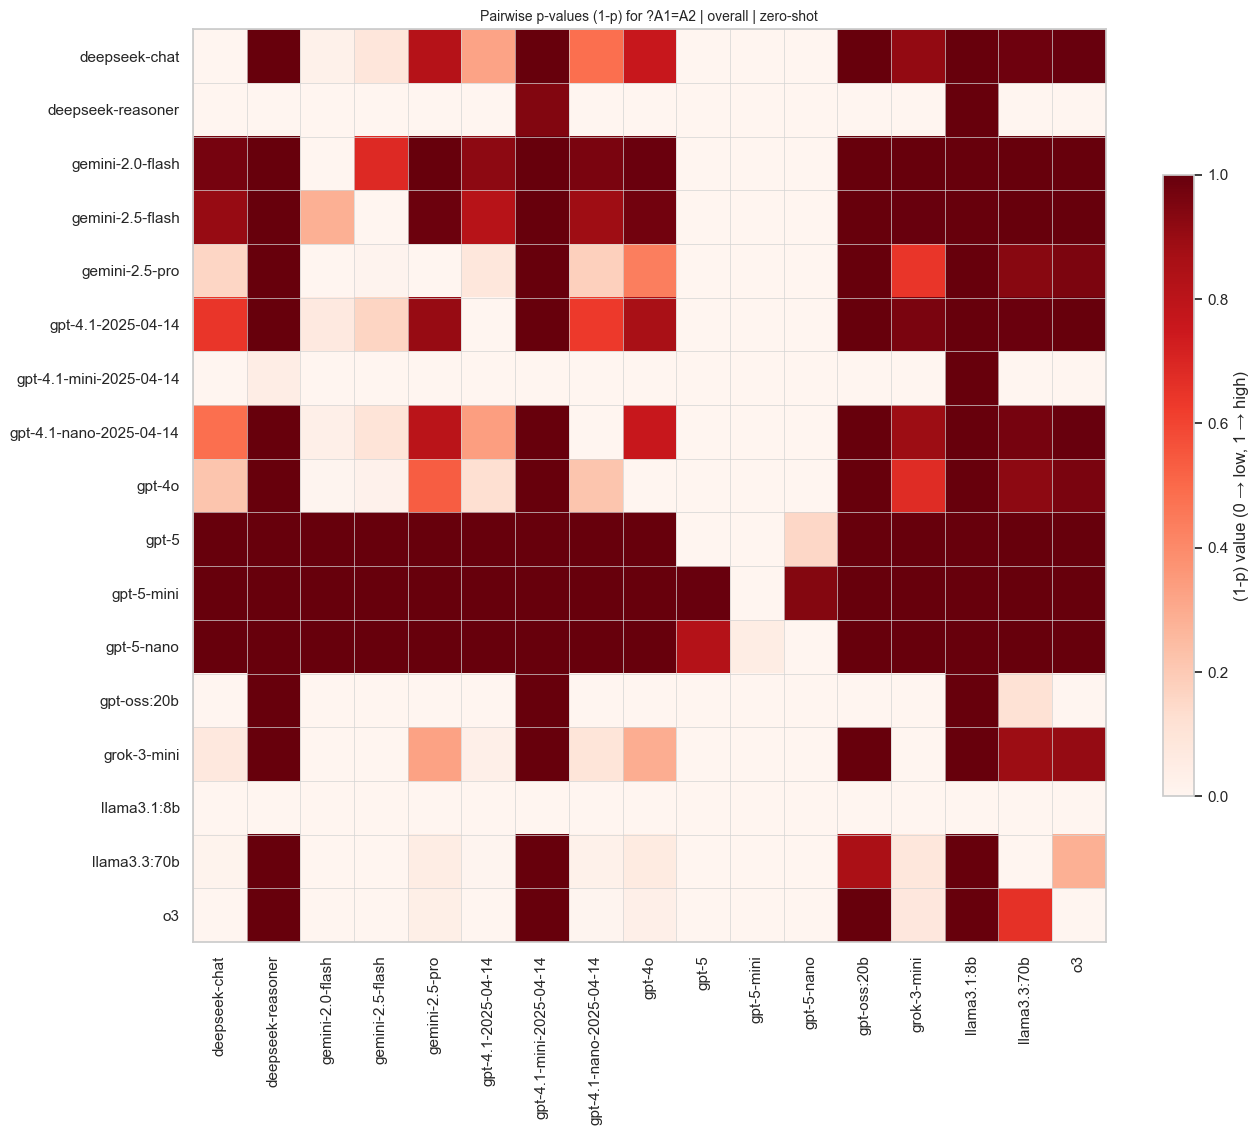

In [104]:
# Example
action = "zero-shot"
dataset = "overall"
predicate = "?A1=A2"

p_matrix = df_p_value[(df_p_value["action"]==action)& (df_p_value["dataset"]==dataset) & (df_p_value["predicate"]==predicate)].drop(columns=["action", "dataset", "predicate"])
llm_names = p_matrix['llm'].to_list()
# mat = p_matrix.set_index('llm').reindex(index=llm_names, columns=llm_names).values
mat = p_matrix.set_index('llm')[llm_names]
mat = 1-mat

alpha = 0.05
mask, annot = make_mask_and_annotations(mat, alpha=alpha)

n, m = mat.shape

fig, ax = plot_single_heatmap_matplotlib(
    mat=mat,
    mask=mask,
    annot=annot,
    title=f"Pairwise p-values (1-p) for {predicate} | {dataset} | {action}",
    alpha=alpha
)
ax.set_box_aspect(n / m)  
ax.set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
def build_square_matrix_for_pred(df, action, dataset, predicate, llms):
    # Filter rows
    sub = df[(df["action"] == action) &
             (df["dataset"] == dataset) &
             (df["predicate"] == predicate)].copy()

    # Coerce numeric on LLM columns
    value_cols = [c for c in sub.columns if c not in ("action", "dataset", "predicate", "llm")]
    sub[value_cols] = sub[value_cols].apply(pd.to_numeric, errors="coerce")

    # Base square matrix
    mat = sub.set_index("llm")[value_cols]

    # Keep only columns that are in llms, then reindex rows/cols to your given order
    cols_in = [c for c in llms if c in mat.columns]
    mat = mat[cols_in]
    mat = mat.reindex(index=llms, columns=llms)  # <-- rank/order by your `llms` list
    return mat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_panel_2xN(
    mats: list[pd.DataFrame],          # 4 or 6 square DataFrames (same LLM order)
    titles: list[str],                 # same length as mats
    llm_names: list[str],              # order used for rows/cols
    show_confidence: bool = False,     # if True, plot 1 - p (confidence)
    cmap: str = "Reds",
    tick_fs: int = 14,                 # bigger tick font
    title_fs: int = 14,                # bigger title font
    wspace: float = 0.05,              # wider col spacing
    hspace: float = 0.15,              # wider row spacing
    cell_in: float = 0.34,             # inches per cell side (scales figure size)
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",
    over_color: str = "black",   # None -> use cmap's deepest red
):
    """
    2x2 or 2x3 heatmaps with a centered horizontal colorbar and a two-line legend below it.
    """
    # Thresholded normalization: show white < low_thr, deepest red > high_thr
    norm = Normalize(vmin=low_thr, vmax=high_thr)

    cmap_obj = plt.get_cmap(cmap).copy()
    cmap_obj.set_under(under_color)
    cmap_obj.set_over(cmap_obj(1.0) if over_color is None else over_color)
    # ---- Validate inputs
    k = len(mats)
    assert k in (4, 6), "Provide exactly 4 or 6 matrices."
    assert len(titles) == k, "titles must match mats length."
    n = len(llm_names)

    # Reindex each matrix to the provided llm_names order and choose what to plot
    mats = [M.reindex(index=llm_names, columns=llm_names) for M in mats]
    datas = [(1.0 - M) if show_confidence else M for M in mats]
    masks = [D.isna() for D in datas]

    heat_cols = 2 if k == 4 else 3   # 2x2 or 2x3
    if k == 4:
        tick_fs -= 2
        title_fs -= 2

    # ---- Figure size: scale with matrix dimension and number of heatmaps
    per_subplot = max(6.5, n * cell_in)
    fig_w = per_subplot * heat_cols
    fig_h = per_subplot * 2 + 1.0    # extra for cbar + legend row
    fig = plt.figure(figsize=(fig_w, fig_h))

    # ---- Grid: add 2 extra rows: one for colorbar, one for legend
    # height ratios: [row1, row2, cbar, legend]
    gs = GridSpec(4, heat_cols,
                  figure=fig,
                  height_ratios=[1, 1, 0.06, 0.11],
                  wspace=wspace, hspace=hspace)

    axes, ims = [], []
    # norm = Normalize(vmin=0.0, vmax=1.0)

    for i in range(k):
        r = i // heat_cols
        c = i % heat_cols
        ax = fig.add_subplot(gs[r, c])
        axes.append(ax)

        D = datas[i].copy()
        D[masks[i]] = np.nan

        # im = ax.imshow(D, norm=norm, cmap=cmap, interpolation="nearest")
        im = ax.imshow(D, norm=norm, cmap=cmap_obj, interpolation="nearest")
        ims.append(im)

        # Square cells
        try:
            ax.set_box_aspect(1.0)
        except Exception:
            ax.set_aspect("equal", adjustable="box")

        # Ticks at every index; show labels only bottom row / left column
        ax.set_xticks(range(n)); ax.set_yticks(range(n))

        if r == 1:  # bottom row
            ax.set_xticklabels([i for i in range(n)], rotation=90, fontsize=tick_fs)
        else:
            ax.set_xticklabels([])

        if c == 0:  # left column
            ax.set_yticklabels([i for i in range(n)], fontsize=tick_fs)
        else:
            ax.set_yticklabels([])

        ax.set_title(titles[i], fontsize=title_fs, pad=3)
        ax.grid(False)

        # thin borders (optional)
        for x in range(n + 1):
            ax.axvline(x - 0.5, color="lightgray", linewidth=0.4)
        for y in range(n + 1):
            ax.axhline(y - 0.5, color="lightgray", linewidth=0.4)

    # ---- Colorbar centered under heatmaps (spans all heatmap columns)
    cax = fig.add_subplot(gs[2, :])
    # cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal")
    cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal", extend="both")
    cbar.set_label("Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
                fontsize=tick_fs, labelpad=2)
    # cbar.ax.tick_params(labelsize=tick_fs, length=3)

    cbar.ax.xaxis.set_label_position('bottom')             # move label to top
    cbar.ax.xaxis.set_ticks_position('bottom')          # keep ticks at bottom
    cbar.ax.tick_params(axis='x', labelsize=tick_fs - 4, labelbottom=True,     # show only bottom tick labels
                        labeltop=False, length=3)
    cbar.set_ticks(np.linspace(low_thr, high_thr, 5))
    # ---- Two-line index→LLM legend directly under the colorbar
    legend_ax = fig.add_subplot(gs[3, :])
    legend_ax.axis("off")

    # split into two lines (0–9, 10–end) with correct indices
    line1 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[:6]))
    line2 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[6:12], start=6))
    line3 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[12:], start=12))

    legend_ax.text(0.5, 0.8, line1, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)
    legend_ax.text(0.5, 0.4, line2, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)
    legend_ax.text(0.5, 0, line3, ha="center", va="center",
                   family="monospace", fontsize=tick_fs)

    # tighter outer margins so plots fill the canvas
    fig.subplots_adjust(left=0.06, right=0.985, top=0.96, bottom=0.04)
    return fig, axes


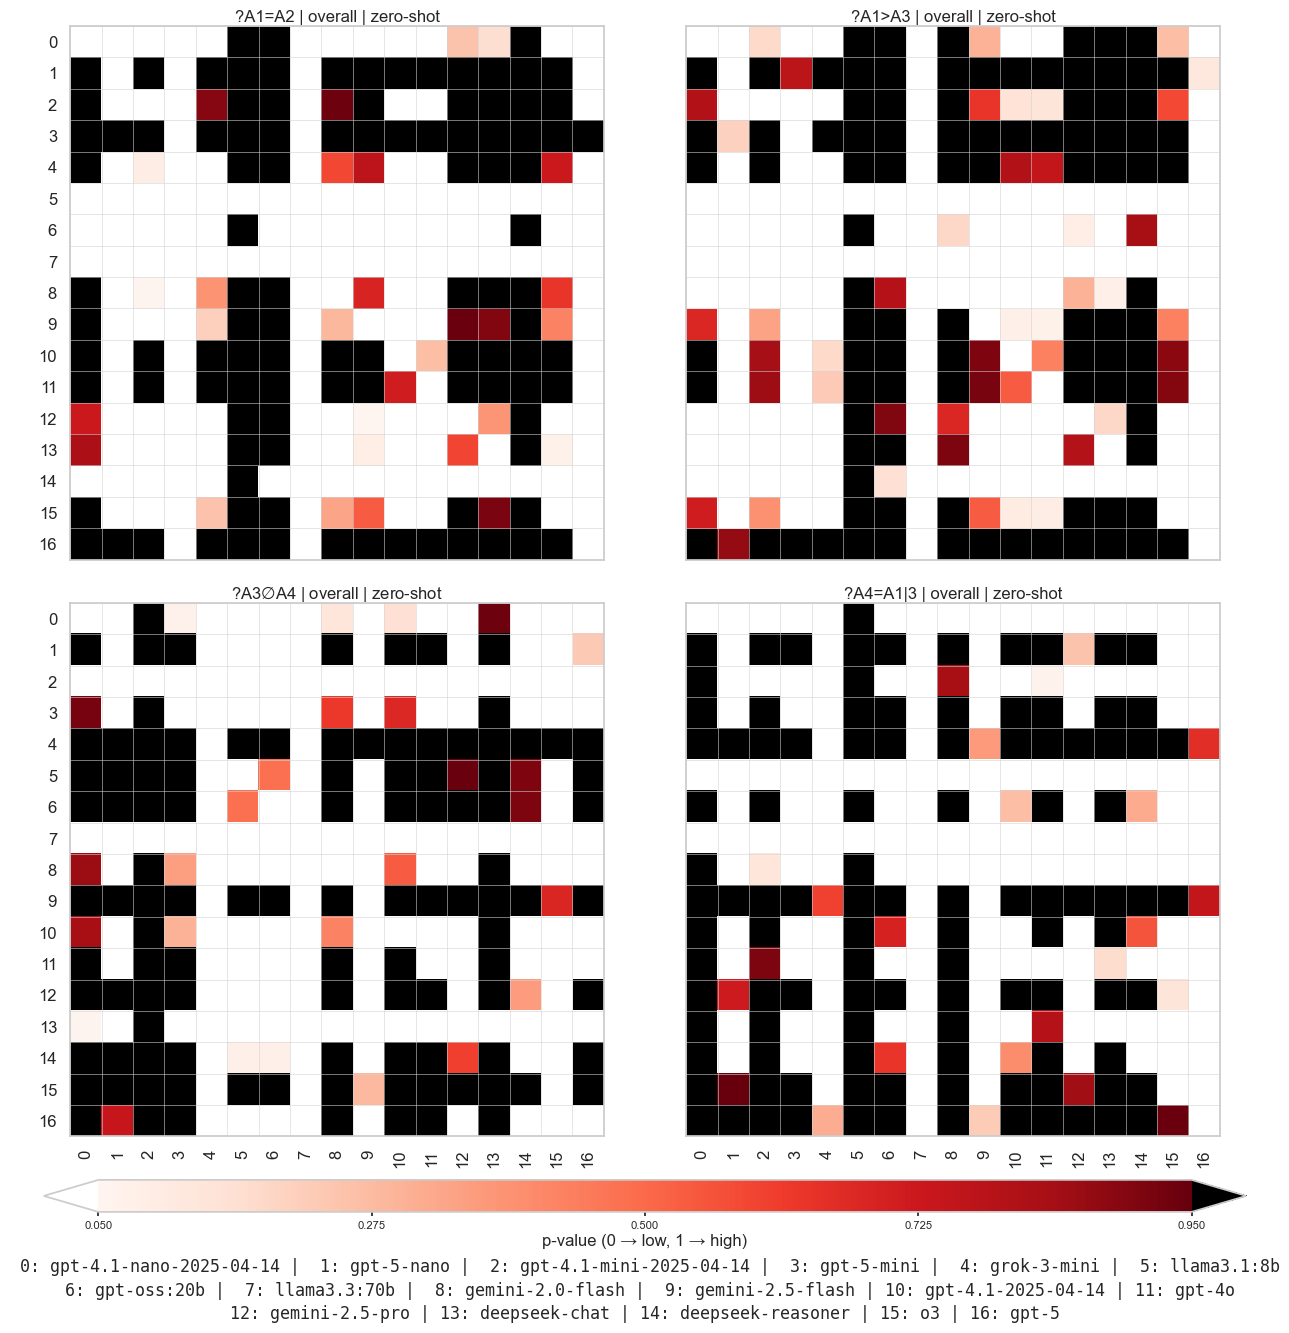

In [430]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.3:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3", "?A1>A4", "?A1=A3+A4", "?A3∅A4", "?A4=A1|3"]
predicates = ["?A1=A2","?A1>A3", "?A3∅A4", "?A4=A1|3"]

action = "zero-shot"
dataset = "overall"

mats = [1 - build_square_matrix_for_pred(df_p_value, action, dataset, p, llms) for p in predicates]


def _latexify_emptyset(s: str) -> str:
    return s.replace("∅", r"$\emptyset$")  # or $\varnothing$

titles = [f"{_latexify_emptyset(p)} | {dataset} | {action}" for p in predicates]

fig, axes = plot_heatmap_panel_2xN(mats=mats, titles=titles, llm_names=llms)


In [253]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

def save_heatmap_panels_by_combo(
    df: pd.DataFrame,
    llms: list[str],
    predicates: list[str],
    out_dir: str = "panels",
    show_confidence: bool = True,    # plot 1 - p by default
    cmap: str = "Reds",
    dpi: int = 300,
    **panel_kwargs,                  # passed through to plot_heatmap_panel_2xN (e.g., low_thr=0.05, high_thr=0.95)
):
    """
    For each (action, dataset) in df, build 4/6 matrices (one per predicate) and save a 2xN panel.
    Expects df columns: ['action','dataset','predicate','llm', <LLM columns...>] with p-values.
    Returns list of saved file paths.
    """

    def _safe(s: str) -> str:
        return re.sub(r"[^a-zA-Z0-9._-]+", "_", str(s)).strip("_")

    def _latexify_emptyset(s: str) -> str:
        return s.replace("∅", r"$\emptyset$")

    def build_square_matrix_for_pred(df_in, action, dataset, predicate, llm_order):
        sub = df_in[(df_in["action"] == action) &
                    (df_in["dataset"] == dataset) &
                    (df_in["predicate"] == predicate)].copy()
        if sub.empty:
            return pd.DataFrame(index=llm_order, columns=llm_order, dtype=float)

        value_cols = [c for c in sub.columns if c not in ("action", "dataset", "predicate", "llm")]
        sub[value_cols] = sub[value_cols].apply(pd.to_numeric, errors="coerce")

        mat = sub.set_index("llm")[value_cols]
        # keep only requested LLMs/columns, then reindex to full order
        cols_in = [c for c in llm_order if c in mat.columns]
        mat = mat[cols_in]
        mat = mat.reindex(index=llm_order, columns=llm_order)
        return mat

    os.makedirs(out_dir, exist_ok=True)
    saved = []

    combos = df[["action", "dataset"]].drop_duplicates().itertuples(index=False, name=None)
    for action, dataset in combos:
        # build per-predicate matrices (RAW p-values)
        mats = [build_square_matrix_for_pred(df, action, dataset, p, llms) for p in predicates]

        # skip if all-NaN across all mats
        if all(m.isna().all().all() for m in mats):
            continue

        titles = [f"{_latexify_emptyset(p)} | {dataset} | {action}" for p in predicates]

        # plot (uses your existing plot_heatmap_panel_2xN)
        fig, _ = plot_heatmap_panel_2xN(
            mats=mats,
            titles=titles,
            llm_names=llms,
            show_confidence=show_confidence,
            cmap=cmap,
            **panel_kwargs
        )

        ds_dir = os.path.join(out_dir, _safe(dataset))
        os.makedirs(ds_dir, exist_ok=True)
        fname = f"{_safe(dataset)}__{_safe(action)}.png"
        fpath = os.path.join(ds_dir, fname)
        fig.savefig(fpath, dpi=dpi, bbox_inches="tight")
        plt.close(fig)
        saved.append(fpath)

    return saved


In [332]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.1:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
paths = save_heatmap_panels_by_combo(
    df=df_p_value,
    llms=llms,
    predicates=predicates,
    out_dir="../../new_charts/p_value_heatmap2X3",
    show_confidence=True,       # plot 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95, over_color="black"  # if your plot function supports thresholds
)


In [333]:
predicates = ["?A1=A2","?A1>A3","?A3∅A4","?A4=A1|3"]
paths = save_heatmap_panels_by_combo(
    df=df_p_value,
    llms=llms,
    predicates=predicates,
    out_dir="../../new_charts/p_value_heatmap2X2",
    show_confidence=True,       # plot 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95, over_color="black"  # if your plot function supports thresholds
)


### Actions

In [458]:
llms = ['gpt-4.1-nano-2025-04-14', 'gpt-5-nano', 'gpt-4.1-mini-2025-04-14', 'gpt-5-mini', 
        'grok-3-mini', 'llama3.1:8b', 'gpt-oss:20b', 
        'llama3.1:70b', 'gemini-2.0-flash', 'gemini-2.5-flash', 
        'gpt-4.1-2025-04-14', 'gpt-4o', 'gemini-2.5-pro', 'deepseek-chat', 'deepseek-reasoner', 'o3', 'gpt-5']# For 6 matrices -> 2x3


predicates = ["?A1=A2","?A1>A3","?A1>A4","?A1=A3+A4","?A3∅A4","?A4=A1|3"]
actions = ["fixing","classification","wikidata"]
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"]

p_value_matrix = df_summery[["action", "dataset", "llm"] + columns]
p_value_matrix

,action,dataset,llm,p(A1=A2),p(A1=A3+A4),p(A1>A3),p(A1>A4),p(A3∅A4),p(A4=A1|3)
0,classification,qawiki,deepseek-chat,0.0000,0.0000,0.0000,0.0000,0.8313,0.0000
1,classification,qawiki,deepseek-reasoner,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2,classification,qawiki,gemini-2.0-flash,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
3,classification,qawiki,gemini-2.5-flash,0.0000,0.0000,0.0000,0.0000,0.7388,0.0000
4,classification,qawiki,gemini-2.5-pro,0.0000,0.0000,0.0000,0.0000,0.0100,0.0000
...,...,...,...,...,...,...,...,...,...
261,zero-shot,overall,gpt-oss:20b,0.5220,0.5251,0.5183,0.5194,0.5255,0.5304
262,zero-shot,overall,grok-3-mini,0.5195,0.5211,0.5191,0.5191,0.5304,0.5215
263,zero-shot,overall,llama3.1:70b,0.5227,0.5363,0.5205,0.5210,0.5205,0.5469
264,zero-shot,overall,llama3.1:8b,0.5660,0.6875,0.5390,0.5456,0.5238,1.0000


In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_actions_1X2_vertical(
    p_value_matrix: pd.DataFrame,   # df with ['llm','action'] + columns (p-values)
    actions: list[str],             # exactly two, e.g. ["fixing","classification"]
    dataset: str,
    columns: list[str],             # predicate columns like ["p(A1=A2)", ...]
    llms: list[str],                # LLM order (x-axis)
    *,
    show_confidence: bool = True,  # True -> plot 1 - p
    cmap: str = "Reds",
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",     # < low_thr
    over_color: str = "black",      # > high_thr
    tick_fs: int = 11,
    title_fs: int = 14,
    cell_in: float = 0.34,          # inches per cell
    wspace: float = 0.20,           # gap between two plots
    cbar_height_ratio: float = 0.055  # shrink colorbar (row height ratio)
):
    if len(actions) != 2:
        raise ValueError("Provide exactly two actions.")

    # Ensure numeric
    sub = p_value_matrix[['llm','action'] + columns].copy()
    for c in columns:
        sub[c] = pd.to_numeric(sub[c], errors="coerce")

    # Build two matrices per action, then TRANSPOSE so:
    # rows = predicates (columns), cols = llms
    mats = []
    for act in actions:
        df_a = sub[sub['action'] == act][['llm'] + columns]
        mat = df_a.set_index('llm').reindex(index=llms, columns=columns).T  # transpose here
        mats.append(mat)

    # Display as p or 1-p
    disp = [(1.0 - M) if show_confidence else M for M in mats]

    n_rows = len(columns)   # predicates on y-axis
    n_cols = len(llms)      # llms on x-axis

    # Figure size to keep cells near-square
    sub_w = max(5.5, n_cols * cell_in)
    sub_h = max(4.8, n_rows * cell_in)
    fig_w = sub_w * 2 + 0.8
    fig_h = sub_h +0.5

    rc = {"text.usetex": False, "font.family": "DejaVu Sans", "mathtext.fontset": "dejavusans"}
    with plt.rc_context(rc):
        fig = plt.figure(figsize=(fig_w, fig_h))
        # 2 rows: (0) shrunken colorbar, (1) heatmaps
        gs = GridSpec(2, 2, figure=fig,
                      height_ratios=[cbar_height_ratio, 1.0],
                      wspace=wspace, hspace=0.10)

        # Thresholded normalization & cmap: bar shows only [low_thr, high_thr]
        norm = Normalize(vmin=low_thr, vmax=high_thr)
        base = plt.get_cmap(cmap)
        try:
            cmap_obj = base.with_extremes(under=under_color, over=over_color)
        except AttributeError:
            cmap_obj = base
            cmap_obj.set_under(under_color)
            cmap_obj.set_over(over_color)

        ims, axes = [], []
        for i, (act, M) in enumerate(zip(actions, disp)):
            ax = fig.add_subplot(gs[1, i])
            axes.append(ax)

            im = ax.imshow(M, norm=norm, cmap=cmap_obj, interpolation="nearest")
            ims.append(im)

            # Square cells: aspect = rows / cols (predicates / llms)
            try:
                ax.set_box_aspect(n_rows / n_cols)
            except Exception:
                ax.set_aspect('equal', adjustable='box')

            ax.set_xticks(range(n_cols))
            ax.set_yticks(range(n_rows))
            ax.set_xticklabels([i for i in range(n_cols)], rotation=0, fontsize=tick_fs)
            if i == 0:  # left column
                ax.set_yticklabels(columns, fontsize=tick_fs)
            else:
                ax.set_yticklabels([])

            # light borders
            for x in range(n_cols + 1):
                ax.axvline(x - 0.5, color="lightgray", linewidth=0.35)
            for y in range(n_rows + 1):
                ax.axhline(y - 0.5, color="lightgray", linewidth=0.35)

            ax.set_title(f"{act} | {dataset}", fontsize=title_fs, pad=6, fontweight="semibold")
            ax.grid(False)

        # Shrunken top colorbar spanning both heatmaps
        cax = fig.add_subplot(gs[0, :])

        cbar = fig.colorbar(ims[0], cax=cax, orientation="horizontal", extend="both")
        cbar.set_label(
            "Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
            fontsize=tick_fs, labelpad=4
        )
        # Put label on top; ticks below
        cbar.ax.xaxis.set_label_position('top')
        cbar.ax.xaxis.set_ticks_position('bottom')
        cbar.ax.tick_params(axis='x', labelbottom=True, labeltop=False,
                            labelsize=max(tick_fs-1, 8), length=2)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))

                    
        # Left subplot: show LLM names once
        # ax.set_yticklabels(columns, fontsize=tick_fs)

        # split into two lines (0–9, 10–end) with correct indices
        line1 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[:6]))
        line2 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[6:12], start=6))
        line3 = " | ".join(f"{i:>2}: {name}" for i, name in enumerate(llm_names[12:], start=12))
        
        legend_ax = fig.add_subplot(gs[1, :])
        legend_ax.axis("off")
        legend_ax.text(0.5, 0.1, line1, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)
        legend_ax.text(0.5, 0.05, line2, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)
        legend_ax.text(0.5, 0, line3, ha="center", va="center",
                    family="monospace", fontsize=tick_fs)

        # Margins: extra bottom for long LLM x-labels
        fig.subplots_adjust(left=0.12, right=0.995, top=0.92, bottom=0.22)

    return fig, axes


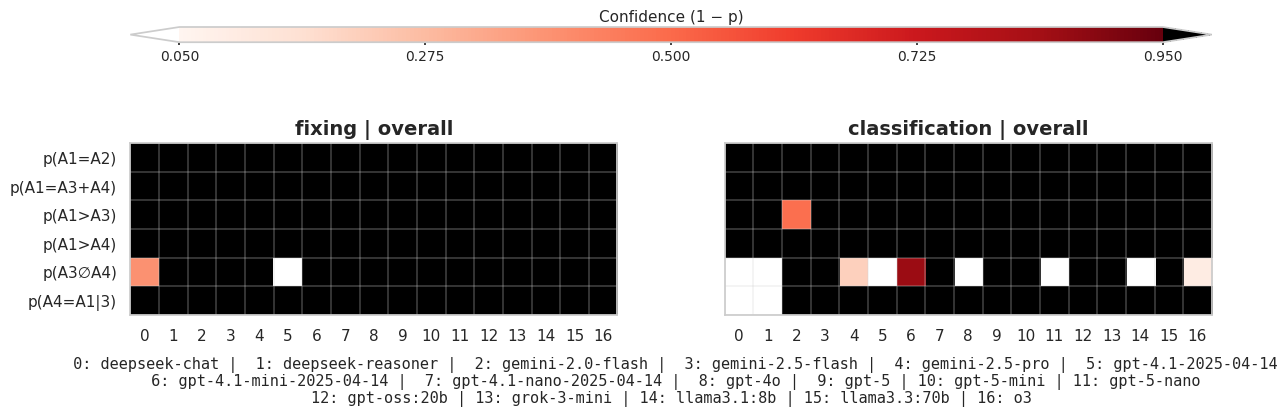

In [468]:
dataset="overall"
df_temp = p_value_matrix[p_value_matrix['dataset'] == dataset]

fig, axes = plot_heatmap_actions_1X2_vertical(
    df_temp, actions=["fixing","classification"], dataset=dataset,
    columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
    llms=llms,
    show_confidence=True,   # True -> 1 - p
    cmap="Reds",
    low_thr=0.05, high_thr=0.95,
    under_color="white", over_color="black",
    tick_fs=11, title_fs=14,
    cell_in=0.34, wspace=0.22, cbar_height_ratio=0.045  # smaller bar
)
# fig.savefig("actions_vertical_1x2.png", dpi=300, bbox_inches="tight")
plt.show()


In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize

def plot_heatmap_actions_1xN(
    p_value_matrix: pd.DataFrame,          # df with ['llm','action'] + columns (p-values)
    actions: list[str],                    # length 2 or 3 (order = plot order left→right)
    dataset: str,
    columns: list[str],                    # predicate columns like ["p(A1=A2)", ...]
    llms: list[str],                       # row order (y-axis)
    *,
    show_confidence: bool = False,         # True -> plot 1 - p
    cmap: str = "Reds",
    low_thr: float = 0.05,
    high_thr: float = 0.95,
    under_color: str = "white",            # < low_thr
    over_color: str = "black",             # > high_thr
    tick_fs: int = 12,
    title_fs: int = 16,
    cell_in: float = 0.34,                 # inches per cell
    wspace: float = 0.0,                  # gap between subplots
    cbar_height_ratio: float = 0.10,       # relative height of colorbar row
    hide_row_labels_on_nonleft: bool = True,
    cbar_width_ratio: float = 0.06,   # <- add this
):
    """
    Plot 1×N heatmaps (N=2 or 3): rows=LLMs, cols=predicates. All share the same color scale.
    - Only the left plot shows y-axis (LLM) labels (unless disabled).
    - Colorbar is compact at the bottom with label above the bar.
    """
    k = len(actions)
    if k not in (2, 3):
        raise ValueError("actions must have length 2 or 3.")

    # Ensure numeric p-values
    sub = p_value_matrix[['llm', 'action'] + columns].copy()
    for c in columns:
        sub[c] = pd.to_numeric(sub[c], errors="coerce")

    # Build matrices (rows=LLMs, cols=predicates) — one per action in the given order
    mats = []
    for act in actions:
        df_a = sub[sub['action'] == act][['llm'] + columns]
        mat = df_a.set_index('llm').reindex(index=llms, columns=columns)
        mats.append(mat)

    # Values to display
    # disp = [(1.0 - M) if show_confidence else M for M in mats]
    disp = [(1.0 - M) if show_confidence else M for M in mats]
    n_rows, n_cols = len(llms), len(columns)

    # Figure size to keep cells square-ish
    sub_w = max(5.0, n_cols * cell_in)
    sub_h = max(5.0, n_rows * cell_in)
    fig_w = sub_w * k + 0.6 + (k-1) * 0.1      # small extra width
    fig_h = sub_h + 1.15                       # room for colorbar

    rc = {"text.usetex": False, "font.family": "DejaVu Sans", "mathtext.fontset": "dejavusans"}
    with plt.rc_context(rc):
        fig = plt.figure(figsize=(fig_w, fig_h))

        # GridSpec: first row = heatmaps, second row = compact colorbar
        gs = GridSpec(1, k + 1, figure=fig, width_ratios=[1.0]*k + [cbar_width_ratio],
              wspace=wspace)


        # Thresholded normalization & colormap [0.05–0.95], with under/over colors
        norm = Normalize(vmin=low_thr, vmax=high_thr)
        base = plt.get_cmap(cmap)
        try:
            cmap_obj = base.with_extremes(under=under_color, over=over_color)
        except AttributeError:
            cmap_obj = base
            cmap_obj.set_under(under_color)
            cmap_obj.set_over(over_color)

        ims, axes = [], []
        for i, (act, M) in enumerate(zip(actions, disp)):
            ax = fig.add_subplot(gs[0, i])
            axes.append(ax)

            im = ax.imshow(M, norm=norm, cmap=cmap_obj, interpolation="nearest")
            ims.append(im)

            # Square cells: aspect = rows / cols
            try:
                ax.set_box_aspect(n_rows / n_cols)
            except Exception:
                ax.set_aspect('equal', adjustable='box')

            # Ticks & labels
            ax.set_xticks(range(n_cols)); ax.set_yticks(range(n_rows))
            ax.set_xticklabels(columns, rotation=90, fontsize=tick_fs)
            if hide_row_labels_on_nonleft and i > 0:
                ax.set_yticklabels([])
            else:
                ax.set_yticklabels(llms, fontsize=tick_fs)

            # light cell borders
            for x in range(n_cols + 1):
                ax.axvline(x - 0.5, color="lightgray", linewidth=0.35)
            for y in range(n_rows + 1):
                ax.axhline(y - 0.5, color="lightgray", linewidth=0.35)

            ax.set_title(f"{act} | {dataset}", fontsize=title_fs, pad=6, fontweight="semibold")
            ax.grid(False)

        # Compact bottom colorbar spanning all heatmaps
        cax = fig.add_subplot(gs[0, -1])   # last column = colorbar
        cbar = fig.colorbar(ims[0], cax=cax, orientation="vertical", extend="both")
        cbar.set_label(
            "Confidence (1 − p)" if show_confidence else "p-value (0 → low, 1 → high)",
            fontsize=tick_fs, labelpad=10
        )
        cbar.ax.yaxis.set_label_position('right')
        cbar.ax.yaxis.set_ticks_position('right')
        cbar.ax.tick_params(axis='y', labelsize=tick_fs, length=3)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))


        cbar.ax.tick_params(axis='x', labelbottom=True, labeltop=False,
                            labelsize=max(tick_fs-1, 9), length=2)
        cbar.set_ticks(np.linspace(low_thr, high_thr, 5))

        # Margins: leave room on the left for LLM names
        left_margin = 0.26 if (not hide_row_labels_on_nonleft or k >= 1) else 0.10
        fig.subplots_adjust(left=left_margin, right=0.99, top=0.93, bottom=0.14)

    return fig, axes


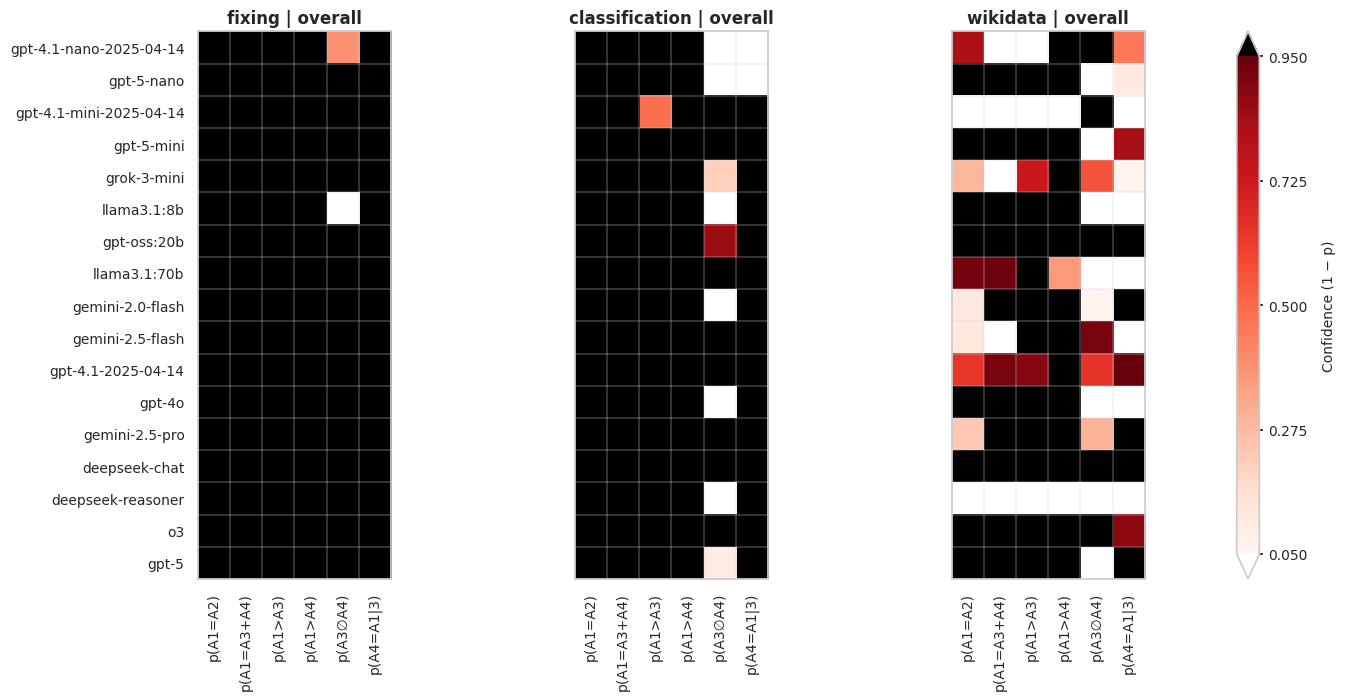

In [469]:
dataset="overall"
df_temp = p_value_matrix[p_value_matrix['dataset'] == dataset]

fig, axes = plot_heatmap_actions_1xN(
    df_temp,
    actions=["fixing", "classification", "wikidata"],
    dataset="overall",
    columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
    llms=llms,
    show_confidence=True,
    cmap="Reds",
    low_thr=0.05, high_thr=0.95,
    under_color="white", over_color="black",
    tick_fs=10, title_fs=12,
    cell_in=0.34, wspace=0.0, cbar_height_ratio=0.06,
    hide_row_labels_on_nonleft=True
)
plt.show()


In [472]:
import os
import matplotlib.pyplot as plt

def save_all_dataset_plots_1X3(
    p_value_matrix: pd.DataFrame,
    actions: list[str],
    columns: list[str],
    llms: list[str],
    out_dir: str = "plots",
    show_confidence: bool = True,
    **kwargs,                     # pass through to plot_heatmap_actions_1xN
):
    """
    For each dataset in p_value_matrix, generate a 1xN heatmap panel and save it.
    """
    os.makedirs(out_dir, exist_ok=True)

    datasets = p_value_matrix['dataset'].unique()
    paths = []
    for ds in datasets:
        df_temp = p_value_matrix[p_value_matrix['dataset'] == ds]

        fig, axes = plot_heatmap_actions_1xN(
            df_temp,
            actions=actions,
            dataset=ds,
            columns=columns,
            llms=llms,
            show_confidence=show_confidence,
            **kwargs
        )

        fname = f"{ds.replace(' ', '_')}_heatmaps.png"
        fpath = os.path.join(out_dir, fname)
        fig.savefig(fpath, dpi=300, bbox_inches="tight")
        plt.close(fig)
        paths.append(fpath)
        print(f"Saved: {fpath}")

    return paths


In [474]:
import os
import matplotlib.pyplot as plt

def save_all_dataset_plots_vertical(
    p_value_matrix: pd.DataFrame,
    actions: list[str],             # must be length 2
    columns: list[str],
    llms: list[str],
    out_dir: str = "plots_vertical",
    show_confidence: bool = True,
    **kwargs,                       # pass-through to plot_heatmap_actions_1X2_vertical
):
    """
    For each dataset in p_value_matrix, generate a 1x2 vertical heatmap panel and save it.
    """
    if len(actions) != 2:
        raise ValueError("plot_heatmap_actions_1X2_vertical requires exactly 2 actions")

    os.makedirs(out_dir, exist_ok=True)

    datasets = p_value_matrix['dataset'].unique()
    paths = []
    for ds in datasets:
        df_temp = p_value_matrix[p_value_matrix['dataset'] == ds]

        fig, axes = plot_heatmap_actions_1X2_vertical(
            df_temp,
            actions=actions,
            dataset=ds,
            columns=columns,
            llms=llms,
            show_confidence=show_confidence,
            **kwargs
        )

        fname = f"{ds.replace(' ', '_')}_vertical.png"
        fpath = os.path.join(out_dir, fname)
        fig.savefig(fpath, dpi=300, bbox_inches="tight")
        plt.close(fig)
        paths.append(fpath)
        print(f"Saved: {fpath}")

    return paths


In [473]:
paths = save_all_dataset_plots_1X3(
p_value_matrix,
actions=["fixing", "classification", "wikidata"],
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
llms=llms,
out_dir="../../new_charts/p_value_heatmap_actions_1x3",
cmap="Reds",
low_thr=0.05, high_thr=0.95,
under_color="white", over_color="black",
tick_fs=10, title_fs=12,
cell_in=0.34, wspace=0.0,
hide_row_labels_on_nonleft=True,
)


Saved: ../../new_charts/p_value_heatmap_actions_1x3/qawiki_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/spinach_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/synthetic_heatmaps.png
Saved: ../../new_charts/p_value_heatmap_actions_1x3/overall_heatmaps.png


In [475]:
paths = save_all_dataset_plots_vertical(
p_value_matrix,
actions=["fixing", "classification"],
columns=["p(A1=A2)", "p(A1=A3+A4)", "p(A1>A3)", "p(A1>A4)", "p(A3∅A4)", "p(A4=A1|3)"],
llms=llms,
out_dir="../../new_charts/p_value_heatmap_actions_1x2",
cmap="Reds",
low_thr=0.05, high_thr=0.95,
under_color="white", over_color="black",
tick_fs=11, title_fs=14,
cell_in=0.34, wspace=0.22, cbar_height_ratio=0.045,
)


Saved: ../../new_charts/p_value_heatmap_actions_1x2/qawiki_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/spinach_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/synthetic_vertical.png
Saved: ../../new_charts/p_value_heatmap_actions_1x2/overall_vertical.png


# BinaryCount 

# Jaccard